In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as sp
%matplotlib inline

In [3]:
Napiecia = pd.read_csv("C:/users/Paulina/Politechnika/ODD/Fazaaa/U-F.dat", delimiter=r"\t").sort_values('f[Hz]')
Fazaaa = pd.read_csv("C:/users/Paulina/Politechnika/ODD/Fazaaa/faza-F.dat", delimiter=r"\t").sort_values('f[Hz]')
Fazaaa['delta_faza'] *=2*np.pi
Napiecia['U[V]'] *= 1e-3
Napiecia['f[Hz]'] *=1e3
Fazaaa['f[Hz]'] *=1e3
plt.rc('font', family='Comic Sans MS')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [1]:
# Fazaaa.plot('f[Hz]','delta_faza',"scatter")
# Z

In [65]:
# L = indukcyjnosc_cewki_dominik = 10e-2#6.14e-2
L = indukcyjnosc = 6.14e-2
Ug = napiecie_generator = 1.3 # volt
dUg = 3*0.015
C = pojemnosc_kondensator = 22200e-12
R = calkowity_opor = 170+50+10
f = Napiecia['f[Hz]']
df = (Napiecia['f[Hz]']*0.01+10)
ddelta = 0.02
dU = 50*0.015*1e-3
dfazaaa = Fazaaa['f[Hz]']*0.01+10
dI = dU/10
Z = impedncja =(R**2+(2*np.pi*f*L-1/(f*2*np.pi*C))**2)**0.5
def Lorenz(f):
    """
    f - czestotliwosc w Hz!!!
    """
    return Ug/(R**2+(L*f*2*np.pi-1/(f*2*np.pi*C))**2)**0.5

def Lorenz_fit(x, A, x0, B):
    return A / ((x-x0)**2 + (B)**2)

Lorenz(4.17e3)

def arcfaza(f):
    return np.arctan2(-R,(L*f*2*np.pi-1/(f*2*np.pi*C))) + np.pi/2

def arcfaza_fit(f, D, B):
    return np.arctan2(-R,D*f + B/f) + np.pi/2

0.10355309639872901

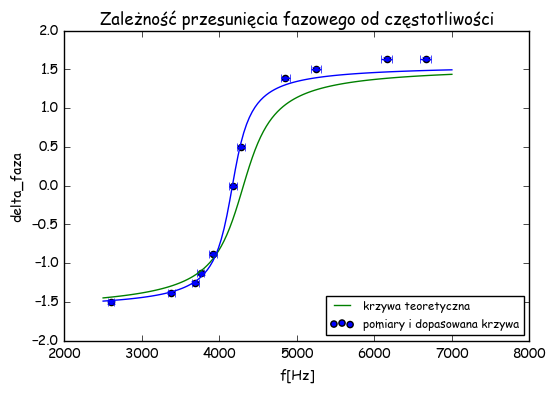

In [66]:
f_plot = np.linspace(2.5e3,7e3,125)
Fazaaa.plot('f[Hz]','delta_faza',"scatter",yerr=ddelta,xerr=dfazaaa,label='pomiary i dopasowana krzywa')
plt.plot(f_plot,arcfaza(f_plot),'g',label='krzywa teoretyczna')
parametry_tangens, kowariancje_tangens = curve_fit(arcfaza_fit, Fazaaa['f[Hz]'], Fazaaa['delta_faza'])
plt.plot(f_plot, arcfaza_fit(f_plot, *parametry_tangens),'b')
plt.legend(loc='lower right',fontsize='small')
plt.title('Zależność przesunięcia fazowego od częstotliwości')
plt.savefig('C:/users/Paulina/Politechnika/ODD/Fazaaa/delta.png')
parametry_tangens[0]/2/np.pi

In [7]:
# notacja z kropeczką
def funkcja(a, b):
    print(a, b)

paczka = (3, 14)
funkcja(paczka[0], paczka[1])
funkcja(*paczka)

3 14
3 14


array([ 1360.41609085,  4188.50336935,   530.15684136])

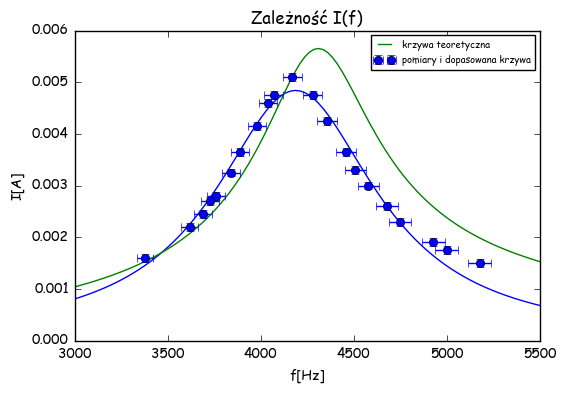

In [64]:
### from scipy.optimize import curve_fit
parametry, kowariancje = curve_fit(Lorenz_fit,
                                   Napiecia['f[Hz]'], # w Hz
                                   Napiecia['U[V]']/10,
                                   p0=[1000, 4170, 100])
plt.xlabel('f[Hz]')
plt.ylabel('I[A]')
plt.title('Zależność I(f)')
f_plot = np.linspace(3e3, 5.5e3, 100)
y_plot = Lorenz_fit(f_plot, *parametry)
plt.plot(f_plot,y_plot)
y = Napiecia['U[V]']/10
x = Napiecia['f[Hz]']
plt.plot(f_plot,Lorenz(f_plot),'g',label='krzywa teoretyczna')
plt.errorbar(x,y,dI,df, "bo",label='pomiary i dopasowana krzywa')
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('C:/users/Paulina/Politechnika/ODD/Fazaaa/If.png')
parametry

I/pierwiosnek 0.00399656998781
szerokość połówkowa 500
szerokosc_polowkowa2 620
dobroć 8.34
dobroć2 6.725806451612903
dobroć teoria 7.230691994909669


array([ 1360.41609085,  4188.50336935,   530.15684136])

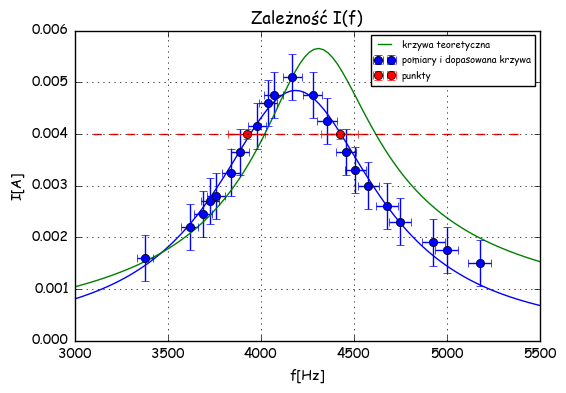

In [54]:
### from scipy.optimize import curve_fit
parametry, kowariancje = curve_fit(Lorenz_fit,
                                  Napiecia['f[Hz]'], # w Hz
                                  Napiecia['U[V]']/10,
                                  p0=[1000, 4170, 100])
plt.xlabel('f[Hz]')
plt.ylabel('I[A]')
plt.title('Zależność I(f)')
f_plot = np.linspace(3e3, 5.5e3, 100)
y_plot = Lorenz_fit(f_plot, *parametry)
plt.plot(f_plot,y_plot)
y = Napiecia['U[V]']/10
x = Napiecia['f[Hz]']
y_plot_dopasowane = Lorenz(f_plot)
y_dobroc = [y_plot_dopasowane.max()/2**0.5] * 2 #dwa razy ten element w liście
# y_dobroc2 = [Napiecia['U[V]'].max()/10/2**0.5] * 2
x_dobroc = [3100, 5400] # tylko dla linii!
print('I/pierwiosnek' ,y_dobroc[1])
plt.plot(x_dobroc, y_dobroc, "r--")

x_punkty = [3925, 4425] # tu się pobawić!
x_punkty2 = [3870, 4490]
szerokosc_polowkowa = x_punkty[1] - x_punkty[0]
szerokosc_polowkowa2 = x_punkty2[1]-x_punkty2[0]
print("szerokość połówkowa", szerokosc_polowkowa)
print('szerokosc_polowkowa2',szerokosc_polowkowa2)
dx = [100] * 2
dy = [0.0001] * 2
plt.plot(f_plot,y_plot_dopasowane,'g',label='krzywa teoretyczna')
plt.errorbar(x,y,dU,df, "bo",label='pomiary i dopasowana krzywa')
plt.errorbar(x_punkty,y_dobroc,dy,dx, "ro",label='punkty')
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('If.png')
plt.grid()
dobroc = 4170/szerokosc_polowkowa
dobroc2 = 4170/szerokosc_polowkowa2
dobroc_teoria = L/(L*C)**0.5/R
print('dobroć', dobroc)
print('dobroć2',dobroc2)
print('dobroć teoria', dobroc_teoria)
parametry